In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
df=pd.read_csv('uber.csv')

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
# from math import cos ,asin, pi ,sqrt

# def distance(lat1,lon1,lat2,lon2):

#   lon1,lon2,lat1,lat2=map(np.radians,[lon1,lon2,lat1,lat2])

#   diff_lon = lon2 - lon1
#   diff_lat = lat2 - lat1

#   km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat1) * np.cos(lat) * np.sin(diff_lon/2.0)**2))

#   return km


In [ ]:
from math import asin, cos, pi,sqrt

def distance(lat1, lon1, lat2,lon2):

  lon1, lon2, lat1, lat2 = map(np.radians,[lon1, lon2, lat1, lat2])

  diff_lat=lat2-lat1
  diff_lon=lon2-lon1

  a=np.sin(diff_lat/2.0)**2
  b=np.sin(diff_lon/2.0)**2 * np.cos(lat1) * np.cos(lat2)

  km = 2 * 6371 * np.arcsin(np.sqrt(a+b))

  return km



In [ ]:
temp=distance( df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
dtype: float64

In [ ]:
df['distance']=temp
df.drop(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

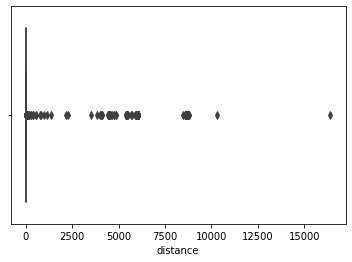

In [ ]:
sns.boxplot(data=df, x='distance')


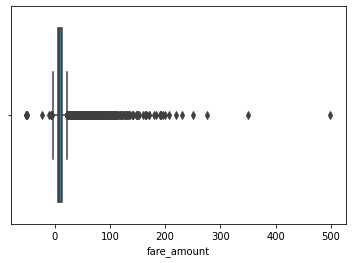

In [ ]:
sns.boxplot(data=df, x='fare_amount')

In [ ]:
Q1=df.distance.quantile(0.25)
Q3=df.distance.quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

df=df[(df['distance'] > LL) & (df['distance'] < UL)]
df.shape

(183244, 4)

In [ ]:
Q1=df.fare_amount.quantile(0.25)
Q3=df.fare_amount.quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

df=df[(df['fare_amount'] > LL) & (df['fare_amount'] < UL)]
df.shape

(176775, 4)

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [ ]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

df.head()

,fare_amount,pickup_datetime,passenger_count,distance,week_day,year,month,hour
0,7.5,2015-05-07 19:52:06+00:00,1,1.683323,Thursday,2015,5,19
1,7.7,2009-07-17 20:04:56+00:00,1,2.457590,Friday,2009,7,20
2,12.9,2009-08-24 21:45:00+00:00,1,5.036377,Monday,2009,8,21
3,5.3,2009-06-26 08:22:21+00:00,3,1.661683,Friday,2009,6,8
4,16.0,2014-08-28 17:47:00+00:00,5,4.475450,Thursday,2014,8,17


In [ ]:
temp=df.copy()


def convert_week_day(day):
  if day in ['Monday','Tuesday','Wednesday','Thursday']:
    return 0
  return 1

def convert_hour(hour):
  if(5<=hour<=12):
    return 1
  elif(12<hour<=17):
    return 2
  elif(17<hour<=24):
    return 3
  return 0

df['week_day'] = temp['week_day'].apply(convert_week_day)
df['hour']= temp['hour'].apply(convert_hour)

df.head()


,fare_amount,pickup_datetime,passenger_count,distance,week_day,year,month,hour
0,7.5,2015-05-07 19:52:06+00:00,1,1.683323,0,2015,5,3
1,7.7,2009-07-17 20:04:56+00:00,1,2.457590,1,2009,7,3
2,12.9,2009-08-24 21:45:00+00:00,1,5.036377,0,2009,8,3
3,5.3,2009-06-26 08:22:21+00:00,3,1.661683,1,2009,6,1
4,16.0,2014-08-28 17:47:00+00:00,5,4.475450,0,2014,8,2


In [ ]:
df.corr()

,fare_amount,passenger_count,distance,week_day,year,month,hour
fare_amount,1.000000,0.016521,0.781220,0.010886,0.141748,0.026307,-0.002491
passenger_count,0.016521,1.000000,0.004228,0.033910,0.001804,0.009533,0.012813
distance,0.781220,0.004228,1.000000,0.036575,-0.026364,0.001426,-0.017157
week_day,0.010886,0.033910,0.036575,1.000000,0.007355,-0.008310,-0.077418
year,0.141748,0.001804,-0.026364,0.007355,1.000000,-0.116880,0.002731
month,0.026307,0.009533,0.001426,-0.008310,-0.116880,1.000000,-0.004183
hour,-0.002491,0.012813,-0.017157,-0.077418,0.002731,-0.004183,1.000000


In [ ]:
# x=df[['distance']].values
# y=df['fare_amount'].values.reshape(-1,1)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# std =StandardScaler()

# x_train= std.fit_transform(x_train)
# x_test=std.fit_transform(x_test)

# y_train= std.fit_transform(y_train)
# y_test=std.fit_transform(y_test)

In [ ]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# def fit_predict(model):
#   model.fit(x_train,y_train.ravel())
#   y_pred=model.predict(x_test)
#   r_squared=r2_score(y_test,y_pred)
#   RMSE=mean_squared_error(y_test,y_pred, squared=False)
#   MAE=mean_absolute_error(y_test,y_pred)

#   print("r_squared = ", r_squared)
#   print("RMSE = ", RMSE)
#   print("MAE = ", MAE)

In [ ]:
# from sklearn.linear_model import LinearRegression
# fit_predict(LinearRegression())


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# fit_predict(RandomForestRegressor()) 

In [ ]:
x=df[['distance']].values
y=df['fare_amount'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

x_train = std.fit_transform(x_train)
x_test=std.fit_transform(x_test)
y_train=std.fit_transform(y_train)
y_test=std.fit_transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

def fit_predict(model):
  model.fit(x_train,y_train.ravel())
  y_pred=model.predict(x_test)
  # a_score=accuracy_score(y_test,y_pred)
  r_squared=r2_score(y_test,y_pred)
  RMSE= mean_squared_error(y_test,y_pred,squared=False)
  MAE= mean_absolute_error(y_test,y_pred)
  print("R2_SCORE ", r_squared)
  print("RMSE ", RMSE)
  print("MAE ", MAE)
  # /print("Accuracy ", a_score)

# from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
# def fit_predict(model):
#     model.fit(x_train,y_train.ravel())
#     y_pred = model.predict(x_test)
#     r_squared = r2_score(y_test,y_pred)
#     RMSE = mean_squared_error(y_test, y_pred,squared=False)
#     MAE = mean_absolute_error(y_test,y_pred)
#     print('R-squared: ', r_squared)
#     print('RMSE: ', RMSE)
#     print("MAE:  ",MAE)

In [ ]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

R2_SCORE  0.6134346673384812
RMSE  0.6217437837739261
MAE  0.4536159471850214


In [ ]:
from sklearn.ensemble import RandomForestRegressor

fit_predict(RandomForestRegressor())

R2_SCORE  0.48446656932637966
RMSE  0.7180065672914282
MAE  0.5208476484705892
